Logistic Regression
k-Nearest Neighbors
Decision Trees
Support Vector Machine
Naive Bayes

I suppose we build the model from scratch?
Do we need to preprocess the data? Are there some highly correlated variables?
feature selection.
SVM 


In [32]:
import numpy as np
import pandas as pd
import scipy
import sklearn as sk
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from mlxtend.plotting import plot_decision_regions

df = pd.read_csv("npf_train.csv")
df
df = df.set_index("date")

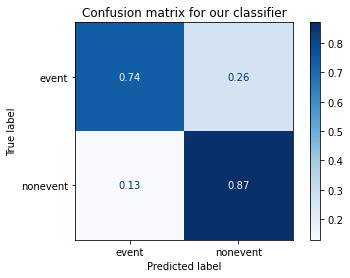

[[3.15000000e+02 0.00000000e+00 3.70077551e+02 ... 6.90409018e-01
  1.67152725e-03 4.85027892e-04]
 [4.52000000e+02 0.00000000e+00 4.01099775e+02 ... 4.82913578e-01
  4.91383679e-03 1.15580454e-03]
 [3.59000000e+02 0.00000000e+00 3.77448880e+02 ... 5.58320064e-01
  6.15891358e-03 7.96902808e-04]
 ...
 [3.60000000e+02 0.00000000e+00 3.81123937e+02 ... 3.41716681e-01
  3.03757595e-03 1.24416938e-03]
 [2.10000000e+01 0.00000000e+00 3.61574537e+02 ... 7.24346747e-01
  4.24648673e-03 9.65462300e-04]
 [3.49000000e+02 0.00000000e+00 3.78386316e+02 ... 9.23022952e-01
  4.76832054e-03 1.95954151e-03]]
accuracy_score:  0.8043478260869565
['event' 'nonevent' 'event' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'event' 'event' 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'event' 'event'
 'event' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'event' 'event' 'event' 'nonevent' 'event' 'nonevent'
 

In [33]:
class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

y = df.class2
X = df.drop(["class2", "class4"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Predict the test set
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

# Get support vectors
support_vectors = clf.support_vectors_
print(support_vectors)
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print(y_pred)


Text(0.5, 0, 'Permutation Importance')

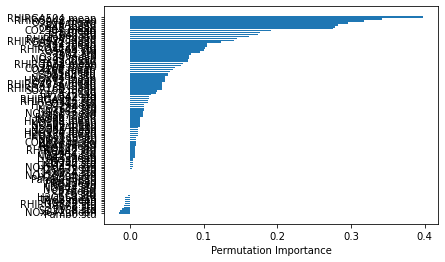

In [34]:
# from sklearn.inspection import permutation_importance
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# %matplotlib inline

# svc =  SVC(kernel='linear',)
# svc.fit(X_train, y_train)

# perm_importance = permutation_importance(svc, X_test, y_test)

# feature_names = list(X_train.columns)
# features = np.array(feature_names)

# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

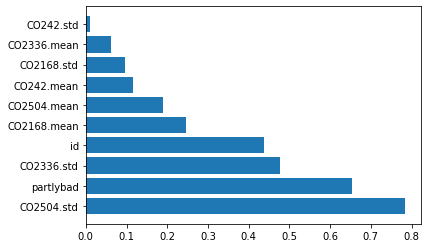

['CO2504.std', 'partlybad', 'CO2336.std', 'id', 'CO2168.mean', 'CO2504.mean', 'CO242.mean', 'CO2168.std', 'CO2336.mean', 'CO242.std']
['CO2504.std', 'partlybad', 'CO2336.std', 'id', 'CO2168.mean', 'CO2504.mean', 'CO242.mean', 'CO2168.std', 'CO2336.mean', 'CO242.std']


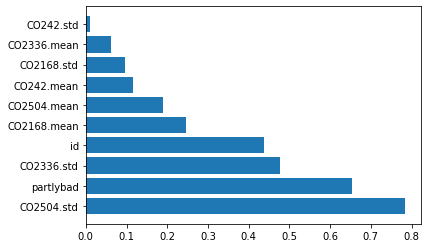

['CO2504.std', 'partlybad', 'CO2336.std', 'id', 'CO2168.mean', 'CO2504.mean', 'CO242.mean', 'CO2168.std', 'CO2336.mean', 'CO242.std']
            partlybad  CO2168.mean  CO2168.std  CO2336.mean  CO2336.std  \
date                                                                      
2000-01-01      False   384.462000    2.284996   384.164462    2.135062   
2000-01-20      False   374.884615    0.415185   374.703333    0.385179   
2000-01-23      False   373.496585    0.189497   373.382593    0.172958   
2000-02-17      False   378.600367    1.934180   378.464862    1.946536   
2000-03-25      False   373.128684    1.096617   372.980000    1.047750   

            CO242.mean  CO242.std  CO2504.mean  CO2504.std  
date                                                        
2000-01-01  385.274688   2.211695   383.885077    1.955198  
2000-01-20  375.621266   0.665720   374.674177    0.435480  
2000-01-23  373.961481   0.235107   373.275062    0.165500  
2000-02-17  379.785872   2.865022  

In [60]:
from sklearn import svm



def f_importances(coef, names, top=-1):
    selected_features = []
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    
    # Show all features
    if top == -1:
        top = len(names)
    
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    selected_features = list(names[::-1][0:top])
    print(selected_features)
    return selected_features
# whatever your features are called
features_names =  list(X_train.columns)

svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
print(f_importances(abs(clf.coef_[0]), feature_names, top=10))

X_selected = X[X.columns[X_train.columns.isin(f_importances(abs(clf.coef_[0]), feature_names, top=10))]]

X_selected = X_selected.drop(['id'], axis=1)
print(X_selected.head())

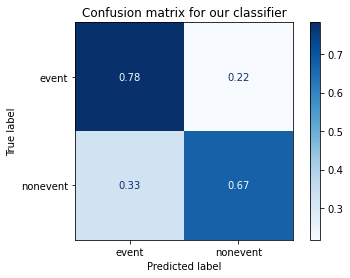

[[  0.         389.06109375   0.68876037 ...   0.64127453 389.0525
    0.60849802]
 [  0.         370.07755102   5.80795977 ...   8.54310818 370.89547945
    5.39505215]
 [  0.         401.09977528  20.96062979 ...  27.65600791 397.39158192
   17.38484514]
 ...
 [  0.         367.64278195   4.57635728 ...   4.77752816 367.61909091
    4.18579394]
 [  0.         378.38631579   6.19809419 ...   6.78395342 378.50888889
    5.56278624]
 [  0.         401.575        1.14584107 ...   1.15217578 401.52603448
    1.07453938]]
accuracy_score2:  0.7282608695652174
['event' 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'nonevent'
 'event' 'event' 'event' 'nonevent' 'event' 'nonevent' 'nonevent'
 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'event' 'event' 'event'
 'nonevent' 'event' 'event' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'nonevent' 'event' 'event' 'event' 'nonevent'
 'nonevent' 'nonevent' '

In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Predict the test set
clf2 = SVC(kernel='linear')
model = svm.SVC(kernel='linear', C=1, gamma=1) 
clf2 = model.fit(X_train2, y_train2)
y_pred2 =clf2.predict(X_test2)

# Generate confusion matrix
matrix2 = plot_confusion_matrix(clf2, X_test2, y_test2,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix2)
plt.show()

# Get support vectors
support_vectors2 = clf2.support_vectors_
print(support_vectors2)
print("accuracy_score2: ", accuracy_score(y_test2, y_pred2))
print(y_pred2)




In [71]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# Load the digits dataset

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(-1,1)
y_pred3 = rfe.predict(y_test)
print(accuracy_score(y_test, y_pred3))
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=['event' 'nonevent' 'event' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'nonevent' 'event' 'event' 'event' 'nonevent' 'nonevent' 'nonevent'
 'event' 'nonevent' 'nonevent' 'nonevent' 'event' 'event' 'event' 'event'
 'nonevent' 'nonevent' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'event' 'event' 'event' 'nonevent' 'event' 'nonevent'
 'event' 'nonevent' 'nonevent' 'event' 'event' 'event' 'nonevent' 'event'
 'event' 'nonevent' 'nonevent' 'event' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'nonevent' 'event' 'nonevent' 'nonevent' 'event' 'nonevent' 'nonevent'
 'event' 'event' 'event' 'nonevent' 'nonevent' 'nonevent' 'nonevent'
 'nonevent' 'event' 'nonevent' 'nonevent' 'event' 'event' 'event'
 'nonevent' 'nonevent' 'nonevent' 'event' 'nonevent' 'nonevent' 'nonevent'
 'event' 'nonevent' 'event'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.